In [ ]:
import requests
import pandas as pd
import json
import datetime

date ='2022-12-03'
#YYYY-MM-DD
#https://apilayer.com/marketplace/fixer-api?live_demo=show#errors

to = 'BRL'
f = 'EUR'
amount = '1'

url = f'https://api.apilayer.com/fixer/convert?to={to}&from={f}&amount={amount}&date={date}'

payload = {}
headers= {
  "apikey": "h9YKwKyk3Cps5HgVVLyF74Wz00BtXFU7"
}

response = requests.request("GET", url, headers=headers, data = payload)

status_code = response.status_code
result = response.json()

print(result)

{'success': True, 'query': {'from': 'EUR', 'to': 'BRL', 'amount': 1}, 'info': {'timestamp': 1670111999, 'rate': 5.490334}, 'date': '2022-12-03', 'historical': True, 'result': 5.490334}


In [ ]:
tabela = pd.json_normalize(result)

In [ ]:

tabela = pd.json_normalize(result)
display(tabela)

#rates_df = pd.json_normalize(tabela.loc['rates'])
#print(rates_df)
#print(tabela[['base',']])
#print(result['query'])
#print(tabela.loc[0])

,success,date,historical,result,query.from,query.to,query.amount,info.timestamp,info.rate
0,True,2022-12-03,True,5.490334,EUR,BRL,1,1670111999,5.490334


In [25]:
import requests
import pandas as pd
import json
import datetime
#https://apilayer.com/marketplace/fixer-api?live_demo=show#errors
data_atual = datetime.datetime.now()
#dia = data_atual.day
#mes = data_atual.month
#ano = data_atual.year
dia = 17
mes = '01'
ano = 2023
i = 9
tabela =[]
tabela2=[]

while i < dia:
  date = f'{ano}-{mes}-{dia}'
  print(date)
  to = 'BRL'
  f = 'EUR'
  amount = '1'

  url = f'https://api.apilayer.com/fixer/convert?to={to}&from={f}&amount={amount}&date={date}'

  payload = {}
  headers= {
    "apikey": "h9YKwKyk3Cps5HgVVLyF74Wz00BtXFU7"
  }

  response = requests.request("GET", url, headers=headers, data = payload)

  status_code = response.status_code
  result = response.json()
  tabela.append(result)
  data_frame = pd.DataFrame(result)
  dia = dia - 1
  i =i+1
  



2023-01-17
2023-01-16
2023-01-15
2023-01-14


In [26]:
#display(data_frame)
#print(data_frame)
tabela = pd.json_normalize(tabela)
display(tabela)

,success,date,historical,result,query.from,query.to,query.amount,info.timestamp,info.rate
0,True,2023-01-17,True,5.502527,EUR,BRL,1,1673999999,5.502527
1,True,2023-01-16,True,5.574627,EUR,BRL,1,1673913599,5.574627
2,True,2023-01-15,True,5.507063,EUR,BRL,1,1673827199,5.507063
3,True,2023-01-14,True,5.519013,EUR,BRL,1,1673740799,5.519013


ValueError: ignored

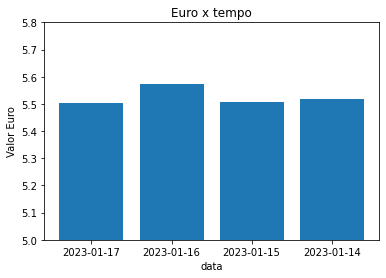

In [31]:
import matplotlib.pyplot as plt

plt.bar(tabela['date'], tabela['info.rate'])
plt.ylim(5, 5.8)

plt.xlabel('data')
plt.ylabel('Valor Euro')
plt.title('Euro x tempo')
plt.text(tabela['date'],tabela['info.rate'], tabela['info.rate'])
plt.show()

